In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Ellipse
sns.set()

In [4]:
df  = pd.read_csv('NFL Play by Play 2009-2017 (v4).csv')
pd.options.display.max_columns = None


/tmp/ipykernel_189/2067984384.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df  = pd.read_csv('NFL Play by Play 2009-2017 (v4).csv')


In [356]:
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [28]:
print(df.groupby('Season').groups.keys())
print(len(df.groupby('GameID')))

dict_keys([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
2304


In [26]:
(df.groupby('Season').GameID.nunique())

Season
2009    256
2010    256
2011    256
2012    256
2013    256
2014    256
2015    256
2016    256
2017    256
Name: GameID, dtype: int64

In [31]:
(df.groupby('Season').HomeTeam.nunique())

Season
2009    32
2010    32
2011    32
2012    32
2013    32
2014    32
2015    32
2016    33
2017    32
Name: HomeTeam, dtype: int64

In [34]:
# Trim to only the columns we need for home vs away data analysis
cols = ['Date', 'GameID', 'posteam', 'DefensiveTeam', 'PlayType', 'PassAttempt', 'PassLength', 'AirYards', 'YardsAfterCatch', 'InterceptionThrown', 'RushAttempt', 'Reception', 'FieldGoalResult', 'FieldGoalDistance', 'Fumble', 'Sack', 'PosTeamScore', 'DefTeamScore', 'HomeTeam', 'AwayTeam', 'Season']
df_trim = df.filter(items=cols)

In [35]:
df_trim[['posteam', 'DefensiveTeam', 'HomeTeam', 'AwayTeam']] = df_trim[['posteam', 'DefensiveTeam', 'HomeTeam', 'AwayTeam']].replace('JAX', 'JAC')

In [36]:
df_trim[['posteam', 'DefensiveTeam', 'HomeTeam', 'AwayTeam']] = df_trim[['posteam', 'DefensiveTeam', 'HomeTeam', 'AwayTeam']].replace('LA', 'LAR')

In [37]:
df_trim.HomeTeam.nunique()

34

In [53]:
def get_season(df, year):
    season = df.groupby('Season')
    return season.get_group(year)
    
def get_results(df):
    df = df.groupby('GameID')
    return df.last()

def add_margins(df):
    """Add the home team's margin as a column to dataframe"""
    df['Margin'] = df.apply(lambda row: row['PosTeamScore'] - row['DefTeamScore']
                                if row['posteam'] == row['HomeTeam']
                                else row['DefTeamScore'] - row['PosTeamScore'], axis=1)
    return df

def season_margins(df):
    """Create a dataframe of teams' home and away margins in a season"""
    home_margin = df.groupby('HomeTeam')['Margin'].sum()
    away_margin = df.groupby('AwayTeam')['Margin'].sum() *-1.0
    total_margin_df = pd.DataFrame({'Team': home_margin.index,
                                'HomeMargin': home_margin.values,
                                'AwayMargin': away_margin.values})
    return total_margin_df

def add_logos(df):
    """Creating a dataframe with team logos
    Citation: https://github.com/tbryan2/NFL-Python-Team-Logo-Viz/blob/main/Team-Logo-Visualizations.ipynb"""
    teams = ['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAC', 'KC', 'LA', 'LAC', 'LAR', 'LV', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SD', 'SEA', 'SF', 'STL', 'TB', 'TEN', 'WAS']
    logos = ['logos/ARI.tif', 'logos/ATL.tif', 'logos/BAL.tif', 'logos/BUF.tif', 'logos/CAR.tif', 'logos/CHI.tif', 'logos/CIN.tif', 'logos/CLE.tif', 'logos/DAL.tif', 'logos/DEN.tif', 'logos/DET.tif', 'logos/GB.tif', 'logos/HOU.tif', 'logos/IND.tif', 'logos/JAC.tif', 'logos/KC.tif', 'logos/LA.tif', 'logos/LAC.tif', 'logos/LAR.tif', 'logos/LV.tif', 'logos/MIA.tif', 'logos/MIN.tif', 'logos/NE.tif', 'logos/NO.tif', 'logos/NYG.tif', 'logos/NYJ.tif', 'logos/OAK.tif', 'logos/PHI.tif', 'logos/PIT.tif', 'logos/SD.tif', 'logos/SEA.tif', 'logos/SF.tif', 'logos/STL.tif', 'logos/TB.tif', 'logos/TEN.tif', 'logos/WAS.tif']
    logo_df = pd.DataFrame({'Team' : teams, 'Logo' : logos})
    return pd.merge(df, logo_df)

In [62]:
games = get_results(df_trim)
for season, group in games.groupby('Season'):
    print (season)
    print ("Home")
    print (group.HomeTeam.value_counts())
    print ("Away")
    print (group.AwayTeam.value_counts())

2009
Home
PIT    8
ATL    8
MIN    8
MIA    8
DAL    8
SD     8
DEN    8
CHI    8
SF     8
BUF    8
WAS    8
TEN    8
PHI    8
NYJ    8
KC     8
JAC    8
DET    8
OAK    8
NE     8
GB     8
SEA    8
NYG    8
ARI    8
TB     8
NO     8
IND    8
HOU    8
CLE    8
CIN    8
CAR    8
BAL    8
STL    8
Name: HomeTeam, dtype: int64
Away
TEN    8
MIA    8
ATL    8
IND    8
NYG    8
BAL    8
CLE    8
PIT    8
SEA    8
TB     8
HOU    8
NO     8
NE     8
OAK    8
ARI    8
CIN    8
CAR    8
SD     8
BUF    8
CHI    8
STL    8
WAS    8
SF     8
DAL    8
DET    8
JAC    8
NYJ    8
MIN    8
DEN    8
PHI    8
KC     8
GB     8
Name: AwayTeam, dtype: int64
2010
Home
NO     8
TB     8
ARI    8
BAL    8
SF     8
IND    8
SD     8
CIN    8
OAK    8
DEN    8
CAR    8
ATL    8
DET    8
DAL    8
CLE    8
MIN    8
GB     8
KC     8
NYJ    8
WAS    8
SEA    8
PHI    8
PIT    8
STL    8
CHI    8
NYG    8
TEN    8
JAC    8
HOU    8
NE     8
BUF    8
MIA    8
Name: HomeTeam, dtype: int64
Away
MIN    8
CLE    8
W

In [30]:
nine_all = get_season(df_trim, 2009)
nine = get_results(nine_all)

In [76]:

nine = add_margins(nine)

In [43]:
nine_margins = season_margins(nine)
nine_margins

,Team,HomeMargin,AwayMargin
0,ARI,-11.0,51.0
1,ATL,34.0,-0.0
2,BAL,133.0,-6.0
3,BUF,-5.0,-52.0
4,CAR,10.0,9.0
5,CHI,27.0,-83.0
6,CIN,57.0,-46.0
7,CLE,-37.0,-86.0
8,DAL,88.0,18.0
9,DEN,-24.0,18.0


In [183]:

def add_logos(df):
    """Creating a dataframe with team logos
    Citation: https://github.com/tbryan2/NFL-Python-Team-Logo-Viz/blob/main/Team-Logo-Visualizations.ipynb"""
    teams = ['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAC', 'KC', 'LA', 'LAC', 'LAR', 'LV', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SD', 'SEA', 'SF', 'STL', 'TB', 'TEN', 'WAS']
    logos = ['logos/ARI.tif', 'logos/ATL.tif', 'logos/BAL.tif', 'logos/BUF.tif', 'logos/CAR.tif', 'logos/CHI.tif', 'logos/CIN.tif', 'logos/CLE.tif', 'logos/DAL.tif', 'logos/DEN.tif', 'logos/DET.tif', 'logos/GB.tif', 'logos/HOU.tif', 'logos/IND.tif', 'logos/JAC.tif', 'logos/KC.tif', 'logos/LA.tif', 'logos/LAC.png', 'logos/LAR.tif', 'logos/LV.tif', 'logos/MIA.tif', 'logos/MIN.tif', 'logos/NE.tif', 'logos/NO.tif', 'logos/NYG.tif', 'logos/NYJ.tif', 'logos/OAK.tif', 'logos/PHI.tif', 'logos/PIT.tif', 'logos/SD.png', 'logos/SEA.tif', 'logos/SF.tif', 'logos/STL.png', 'logos/TB.tif', 'logos/TEN.tif', 'logos/WAS.tif']
    logo_df = pd.DataFrame({'Team' : teams, 'Logo' : logos})
    return pd.merge(df, logo_df)


In [46]:
nine_margins = add_logos(nine_margins)
nine_margins

,Team,HomeMargin,AwayMargin,Logo
0,ARI,-11.0,51.0,logos/ARI.tif
1,ATL,34.0,-0.0,logos/ATL.tif
2,BAL,133.0,-6.0,logos/BAL.tif
3,BUF,-5.0,-52.0,logos/BUF.tif
4,CAR,10.0,9.0,logos/CAR.tif
5,CHI,27.0,-83.0,logos/CHI.tif
6,CIN,57.0,-46.0,logos/CIN.tif
7,CLE,-37.0,-86.0,logos/CLE.tif
8,DAL,88.0,18.0,logos/DAL.tif
9,DEN,-24.0,18.0,logos/DEN.tif


In [1]:
# Creating a scatter plot with team logos
# Citation: https://fcpython.com/visualisation/creating-scatter-plots-with-club-logos-in-python

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.08, alpha = 1)

def plot_margins(df, year, point, rot, SB, sb_x, sb_y, homecol='HomeMargin', awaycol='AwayMargin'):
    
    plt.rcParams["figure.figsize"] = [10, 10]
    fig, ax = plt.subplots()
    plt.scatter(df[homecol], df[awaycol], alpha=0)  
    
    plt.xlim(min(df[homecol]) - 0.1, max(df[homecol]) + 0.1)
    plt.ylim(min(df[awaycol]) - 0.1, max(df[awaycol]) + 0.1)

    for index, row in df.iterrows():
        ab = AnnotationBbox(getImage(row['Logo']), (row[homecol], row[awaycol]), frameon=False)
        ax.add_artist(ab)
        if row.Team == SB:
            plt.annotate("The Patriots", (row[homecol]+sb_x, row[awaycol]+sb_y), fontsize=8, color='red')

    plt.axline((0,0), slope=1, linestyle='--', color='black')
    offset = 0.05
    plt.annotate("Better Away", (point+offset, point-offset), fontsize=11, color='gray', rotation=rot)
    plt.annotate("Better at Home", (point-offset, point+offset), fontsize=11, color='gray', rotation=rot)
    plt.title(f"Home vs Away Penalties Received for {year}", fontsize=20)
    plt.xlabel("Penalties per game at home", fontsize=20)
    plt.ylabel("Penalties per game away", fontsize=20)

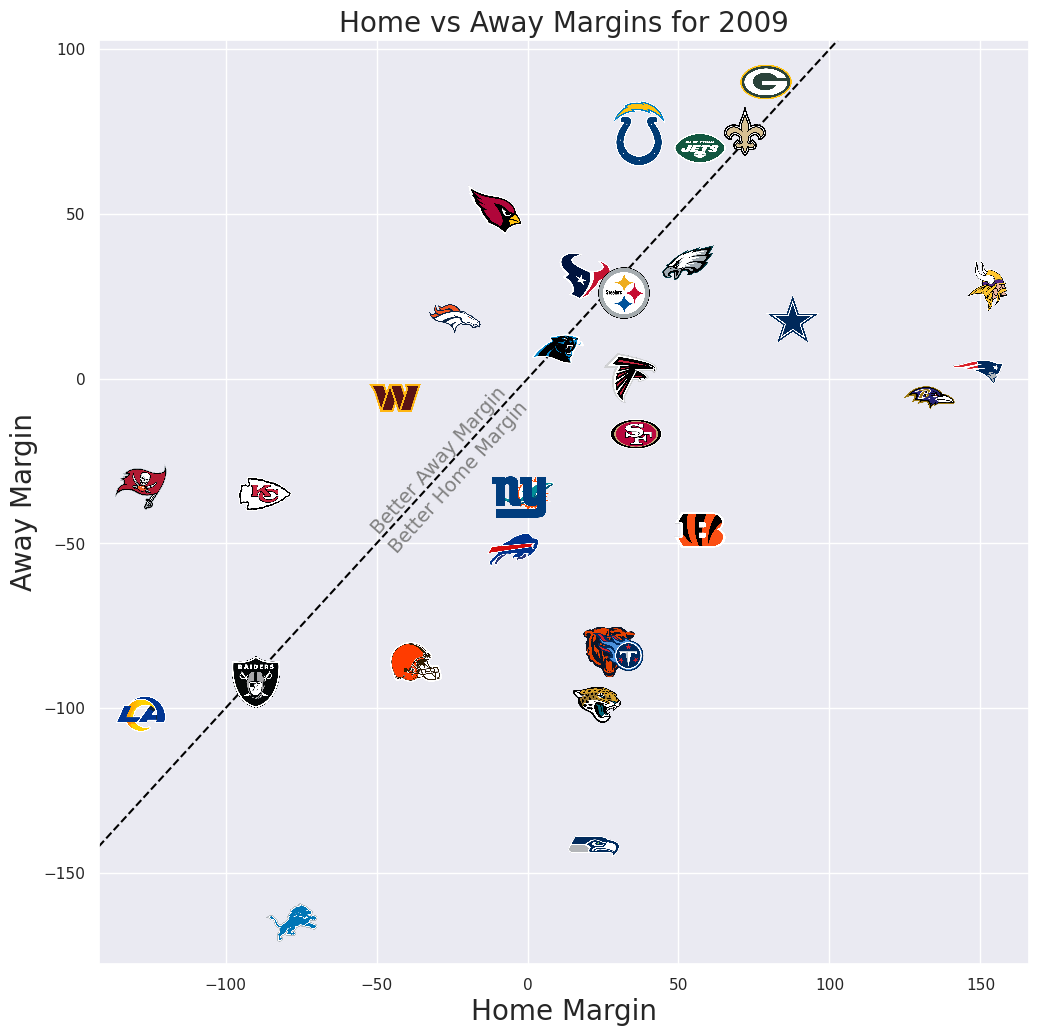

In [69]:
plot_margins(nine_margins, "2009", -50)

In [7]:
del df

In [8]:
def create_year_margins(year):
    """Create a dataframe of all teams' home and away margins for a year"""
    year_all = get_season(df_trim, year)
    year_df = get_results(year_all)
    year_df = add_margins(year_df)
    year_df_margins = season_margins(year_df)
    year_df_margins = add_logos(year_df_margins)
    return year_df_margins

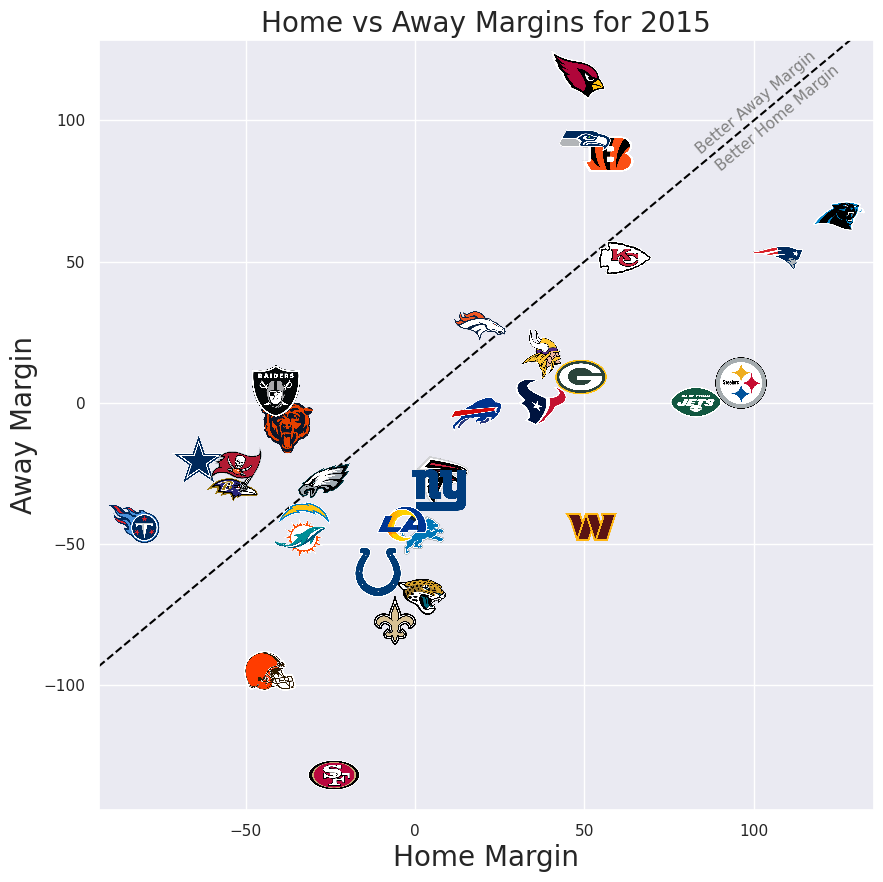

In [88]:
fifteen_margins = create_year_margins(2015)
plot_margins(fifteen_margins, "2015", 85, 40)

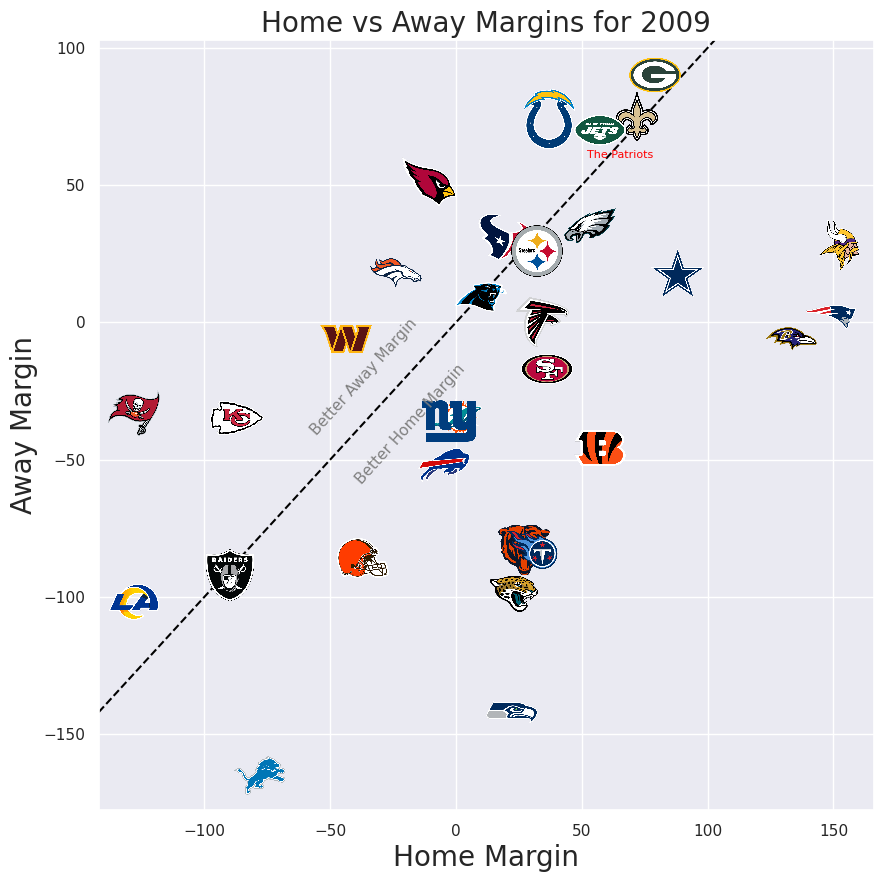

In [145]:
nine_margins = create_year_margins(2009)
plot_margins(nine_margins, "2009", -50, 48, "NO", -20, -15)

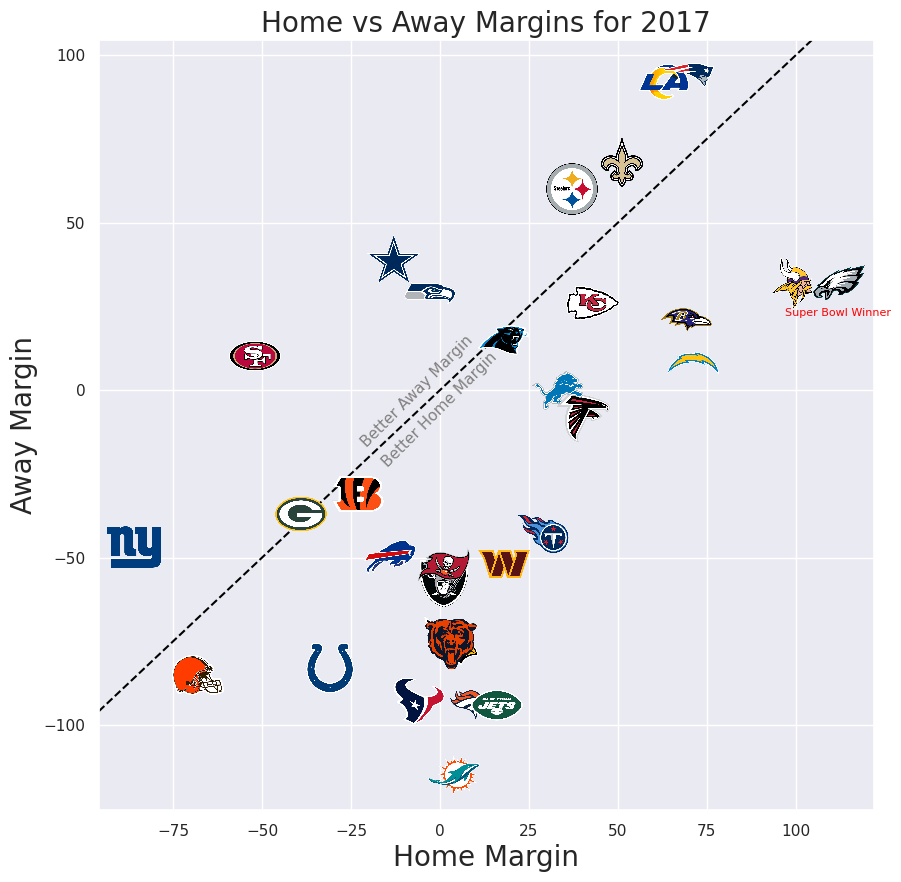

In [41]:
seventeen_margins = create_year_margins(2017)
plot_margins(seventeen_margins, "2017", -20, 45, "PHI", sb_x = -15, sb_y = -10)

In [9]:
thirteen_margins = create_year_margins(2013)

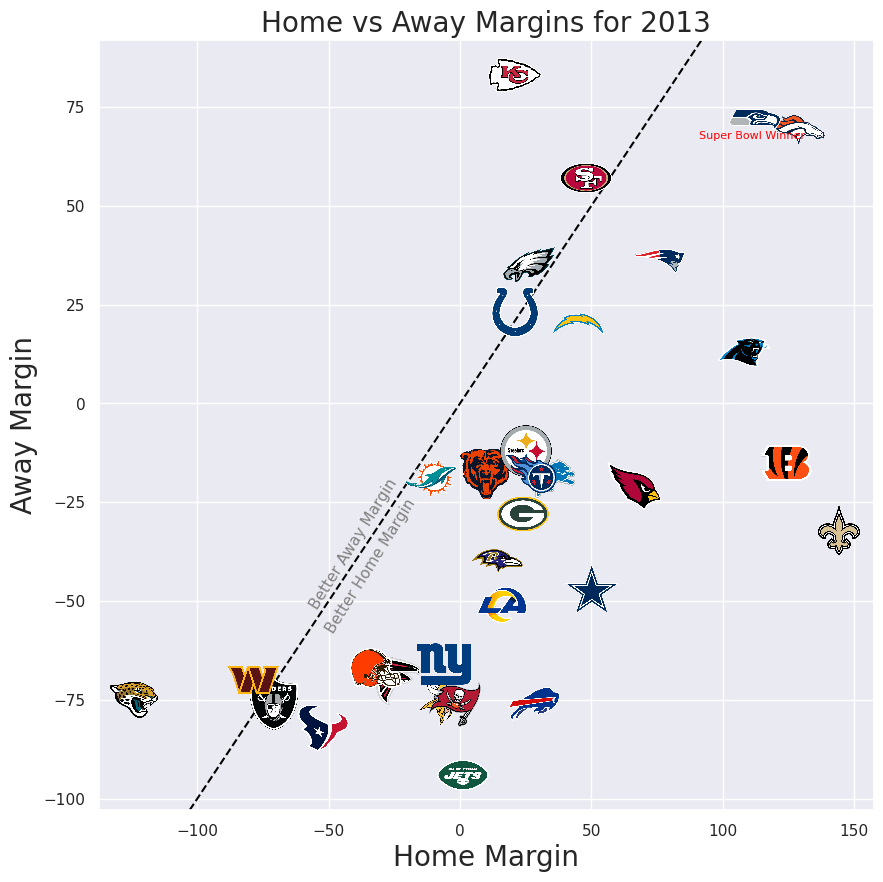

In [33]:
plot_margins(thirteen_margins, "2013", -55, 58, "SEA")

In [13]:
thirteen_margins

,Team,HomeMargin,AwayMargin,Logo
0,ARI,66.0,-21.0,logos/ARI.tif
1,ATL,-25.0,-70.0,logos/ATL.tif
2,BAL,14.0,-40.0,logos/BAL.tif
3,BUF,28.0,-76.0,logos/BUF.tif
4,CAR,108.0,13.0,logos/CAR.tif
5,CHI,10.0,-18.0,logos/CHI.tif
6,CIN,124.0,-15.0,logos/CIN.tif
7,CLE,-32.0,-67.0,logos/CLE.tif
8,DAL,50.0,-47.0,logos/DAL.tif
9,DEN,129.0,69.0,logos/DEN.tif


In [149]:
all_years_df = get_results(df_trim)
all_years_df = add_margins(all_years_df)
all_years_df_margins = season_margins(all_years_df)
#all_years_df_margins = add_logos(all_years_df_margins)
all_years_df_margins.sort_values(by=['HomeMargin'], ascending=False)

,Team,HomeMargin,AwayMargin
20,NE,885.0,567.0
11,GB,621.0,91.0
2,BAL,539.0,-77.0
26,PIT,510.0,138.0
21,NO,495.0,117.0
28,SEA,484.0,5.0
19,MIN,324.0,-163.0
1,ATL,313.0,35.0
9,DEN,304.0,-32.0
6,CIN,291.0,-38.0


In [79]:
all_years_df_margins.sort_values(by=['AwayMargin'], ascending=False)

,Team,HomeMargin,AwayMargin
20,NE,885.0,567.0
26,PIT,510.0,138.0
21,NO,495.0,117.0
11,GB,621.0,91.0
8,DAL,154.0,82.0
25,PHI,275.0,52.0
1,ATL,313.0,35.0
16,LAC,71.0,8.0
17,LAR,-18.0,7.0
28,SEA,484.0,5.0


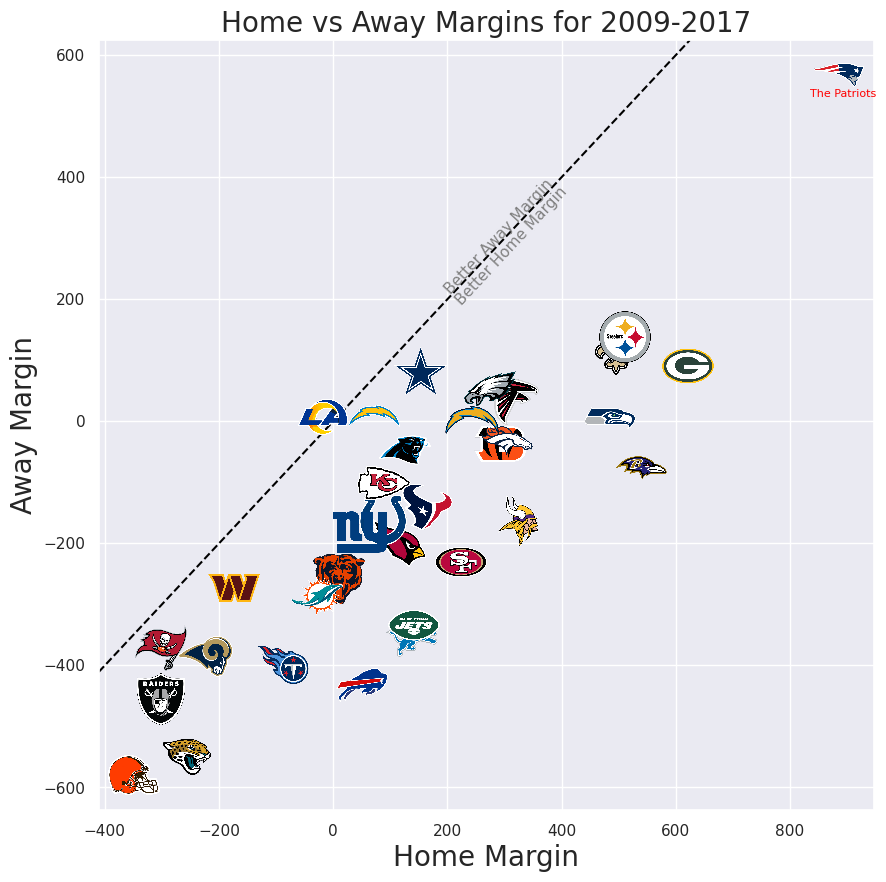

In [82]:
#all_years_df_margins = add_logos(all_years_df_margins)
plot_margins(all_years_df_margins, "2009-2017", 200, 47, "NE", -50, -35)

In [83]:
all_years_df

,Date,posteam,DefensiveTeam,PlayType,PassAttempt,PassLength,AirYards,YardsAfterCatch,InterceptionThrown,RushAttempt,Reception,FieldGoalResult,FieldGoalDistance,Fumble,Sack,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,Season,Margin
GameID,,,,,,,,,,,,,,,,,,,,,
2009091000,2009-09-10,PIT,TEN,Field Goal,0,Deep,0,0,0,0,0,Good,33.0,0,0,10.0,10.0,PIT,TEN,2009,0.0
2009091300,2009-09-13,ATL,MIA,End of Game,0,Short,0,0,0,0,0,Good,50.0,0,0,19.0,7.0,ATL,MIA,2009,12.0
2009091301,2009-09-13,KC,BAL,End of Game,0,Deep,0,0,0,0,0,Good,53.0,0,0,23.0,38.0,BAL,KC,2009,15.0
2009091302,2009-09-13,PHI,CAR,End of Game,0,Short,0,0,0,0,0,Blocked,51.0,0,0,36.0,10.0,CAR,PHI,2009,-26.0
2009091303,2009-09-13,CIN,DEN,Pass,1,Deep,57,0,1,0,0,Good,50.0,0,0,7.0,12.0,CIN,DEN,2009,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017123111,2017-12-31,TEN,JAC,End of Game,0,Deep,0,0,0,0,0,Good,38.0,0,0,15.0,3.0,TEN,JAC,2017,12.0
2017123112,2017-12-31,KC,DEN,Field Goal,0,Short,0,0,0,0,0,Good,30.0,0,0,23.0,17.0,DEN,KC,2017,-6.0
2017123113,2017-12-31,LAC,OAK,End of Game,0,Short,0,0,0,0,0,Good,25.0,0,0,30.0,10.0,LAC,OAK,2017,20.0


In [150]:
all_years_df['Winner'] = pd.np.where(all_years_df['Margin'] > 0, 'HomeTeam', pd.np.where(all_years_df['Margin'] < 0, 'AwayTeam', 'tie'))


/tmp/ipykernel_315/2786424192.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  all_years_df['Winner'] = pd.np.where(all_years_df['Margin'] > 0, 'HomeTeam', pd.np.where(all_years_df['Margin'] < 0, 'AwayTeam', 'tie'))


In [88]:
all_years_df

,Date,posteam,DefensiveTeam,PlayType,PassAttempt,PassLength,AirYards,YardsAfterCatch,InterceptionThrown,RushAttempt,Reception,FieldGoalResult,FieldGoalDistance,Fumble,Sack,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,Season,Margin,Winner
GameID,,,,,,,,,,,,,,,,,,,,,,
2009091000,2009-09-10,PIT,TEN,Field Goal,0,Deep,0,0,0,0,0,Good,33.0,0,0,10.0,10.0,PIT,TEN,2009,0.0,tie
2009091300,2009-09-13,ATL,MIA,End of Game,0,Short,0,0,0,0,0,Good,50.0,0,0,19.0,7.0,ATL,MIA,2009,12.0,HomeTeam
2009091301,2009-09-13,KC,BAL,End of Game,0,Deep,0,0,0,0,0,Good,53.0,0,0,23.0,38.0,BAL,KC,2009,15.0,HomeTeam
2009091302,2009-09-13,PHI,CAR,End of Game,0,Short,0,0,0,0,0,Blocked,51.0,0,0,36.0,10.0,CAR,PHI,2009,-26.0,AwayTeam
2009091303,2009-09-13,CIN,DEN,Pass,1,Deep,57,0,1,0,0,Good,50.0,0,0,7.0,12.0,CIN,DEN,2009,-5.0,AwayTeam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017123111,2017-12-31,TEN,JAC,End of Game,0,Deep,0,0,0,0,0,Good,38.0,0,0,15.0,3.0,TEN,JAC,2017,12.0,HomeTeam
2017123112,2017-12-31,KC,DEN,Field Goal,0,Short,0,0,0,0,0,Good,30.0,0,0,23.0,17.0,DEN,KC,2017,-6.0,AwayTeam
2017123113,2017-12-31,LAC,OAK,End of Game,0,Short,0,0,0,0,0,Good,25.0,0,0,30.0,10.0,LAC,OAK,2017,20.0,HomeTeam


In [153]:
all_years_df['Winner'] = all_years_df['Winner'].apply(lambda x: 1 if x == 'HomeTeam' else (-1 if x == 'AwayTeam' else 0))


In [93]:
all_years_df

,Date,posteam,DefensiveTeam,PlayType,PassAttempt,PassLength,AirYards,YardsAfterCatch,InterceptionThrown,RushAttempt,Reception,FieldGoalResult,FieldGoalDistance,Fumble,Sack,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,Season,Margin,Winner
GameID,,,,,,,,,,,,,,,,,,,,,,
2009091000,2009-09-10,PIT,TEN,Field Goal,0,Deep,0,0,0,0,0,Good,33.0,0,0,10.0,10.0,PIT,TEN,2009,0.0,0
2009091300,2009-09-13,ATL,MIA,End of Game,0,Short,0,0,0,0,0,Good,50.0,0,0,19.0,7.0,ATL,MIA,2009,12.0,1
2009091301,2009-09-13,KC,BAL,End of Game,0,Deep,0,0,0,0,0,Good,53.0,0,0,23.0,38.0,BAL,KC,2009,15.0,1
2009091302,2009-09-13,PHI,CAR,End of Game,0,Short,0,0,0,0,0,Blocked,51.0,0,0,36.0,10.0,CAR,PHI,2009,-26.0,-1
2009091303,2009-09-13,CIN,DEN,Pass,1,Deep,57,0,1,0,0,Good,50.0,0,0,7.0,12.0,CIN,DEN,2009,-5.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017123111,2017-12-31,TEN,JAC,End of Game,0,Deep,0,0,0,0,0,Good,38.0,0,0,15.0,3.0,TEN,JAC,2017,12.0,1
2017123112,2017-12-31,KC,DEN,Field Goal,0,Short,0,0,0,0,0,Good,30.0,0,0,23.0,17.0,DEN,KC,2017,-6.0,-1
2017123113,2017-12-31,LAC,OAK,End of Game,0,Short,0,0,0,0,0,Good,25.0,0,0,30.0,10.0,LAC,OAK,2017,20.0,1


In [96]:
head_to_head_table = pd.crosstab(all_years_df['HomeTeam'], all_years_df['AwayTeam'], values=all_years_df['Winner'], aggfunc='sum', margins=True, margins_name='Total')


In [97]:
head_to_head_table

AwayTeam,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,DET,GB,HOU,IND,JAC,KC,LAC,LAR,MIA,MIN,NE,NO,NYG,NYJ,OAK,PHI,PIT,SD,SEA,SF,STL,TB,TEN,WAS,Total
HomeTeam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARI,NaN,1.0,1.0,0.0,1.0,-1.0,1.0,0.0,-2.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,NaN,-2.0,0.0,2.0,-1.0,1.0,0.0,1.0,1.0,2.0,-1.0,1.0,-3.0,-1.0,0.0,1.0,1.0,2.0,11
ATL,2.0,NaN,1.0,0.0,6.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,-1.0,1.0,1.0,NaN,NaN,0.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,2.0,1.0,3.0,1.0,2.0,27
BAL,1.0,1.0,NaN,1.0,1.0,0.0,0.0,8.0,1.0,1.0,2.0,-1.0,3.0,1.0,2.0,0.0,NaN,NaN,3.0,1.0,-2.0,1.0,1.0,2.0,0.0,1.0,3.0,-1.0,-1.0,1.0,0.0,1.0,1.0,-1.0,31
BUF,1.0,0.0,1.0,NaN,1.0,-1.0,-1.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,-1.0,NaN,NaN,4.0,1.0,-9.0,-2.0,-1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,2.0,-2.0,1.0,5
CAR,2.0,1.0,-1.0,0.0,NaN,0.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.0,-1.0,1.0,-3.0,2.0,1.0,2.0,-1.0,3.0,12
CHI,-2.0,0.0,-1.0,0.0,1.0,NaN,1.0,2.0,0.0,-1.0,1.0,-6.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,-1.0,6.0,-1.0,-2.0,1.0,1.0,1.0,-1.0,1.0,1.0,-2.0,0.0,2.0,1.0,-1.0,-3.0,-4
CIN,1.0,1.0,5.0,0.0,0.0,0.0,NaN,7.0,1.0,-2.0,2.0,-1.0,-4.0,2.0,1.0,2.0,NaN,NaN,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-4.0,2.0,1.0,-1.0,1.0,-1.0,1.0,0.0,18
CLE,-1.0,-1.0,-4.0,0.0,1.0,-1.0,-1.0,NaN,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,NaN,NaN,0.0,-2.0,0.0,1.0,-1.0,-2.0,1.0,-1.0,-3.0,1.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-16
DAL,-1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0,NaN,0.0,1.0,-2.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,2.0,-4.0,0.0,-1.0,0.0,-1.0,2.0,2.0,-1.0,3.0,-4


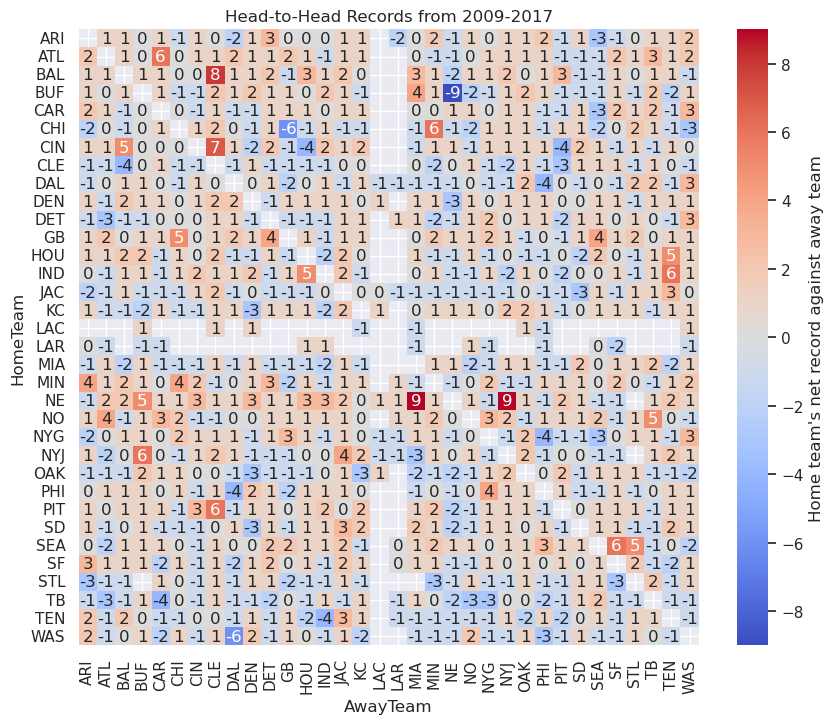

In [141]:
head_to_head_table = pd.crosstab(all_years_df['HomeTeam'], all_years_df['AwayTeam'], values=all_years_df['Winner'], aggfunc='sum')
plt.figure(figsize=(10, 8))
sns.heatmap(head_to_head_table, annot=True, cmap='coolwarm', fmt='.0f', cbar_kws={'label': "Home team's net record against away team"})
plt.title('Head-to-Head Records from 2009-2017')
plt.show()

In [151]:
def add_home_score(df):
    """Add the home team's score and away team's score as columns to dataframe"""
    df['HomeScore'] = df.apply(lambda row: row['PosTeamScore']
                                if row['posteam'] == row['HomeTeam']
                                else row['DefTeamScore'], axis=1)
    df['AwayScore'] = df.apply(lambda row: row['PosTeamScore']
                                if row['posteam'] == row['AwayTeam']
                                else row['DefTeamScore'], axis=1)
    df['HomeScore'] = df.apply(lambda row: row['PosTeamScore']
                                if row['posteam'] == row['HomeTeam']
                                else row['DefTeamScore'], axis=1)
    df['AwayScore'] = df.apply(lambda row: row['PosTeamScore']
                                if row['posteam'] == row['AwayTeam']
                                else row['DefTeamScore'], axis=1)
    return df

all_years_df = add_home_score(all_years_df)

In [186]:
def offense(df):
    """Create a dataframe of teams' home and away scoring in a season"""
    home_offense = df.groupby('HomeTeam')['HomeScore'].mean()
    away_offense = df.groupby('AwayTeam')['AwayScore'].mean()
    total_offense_df = pd.DataFrame({'Team': home_offense.index,
                                'HomeMargin': home_offense.values,
                                'AwayMargin': away_offense.values,
                                'NetHomeMargin': (home_offense.values-away_offense.values)
                                    })
    return total_offense_df

offense_all = offense(all_years_df)

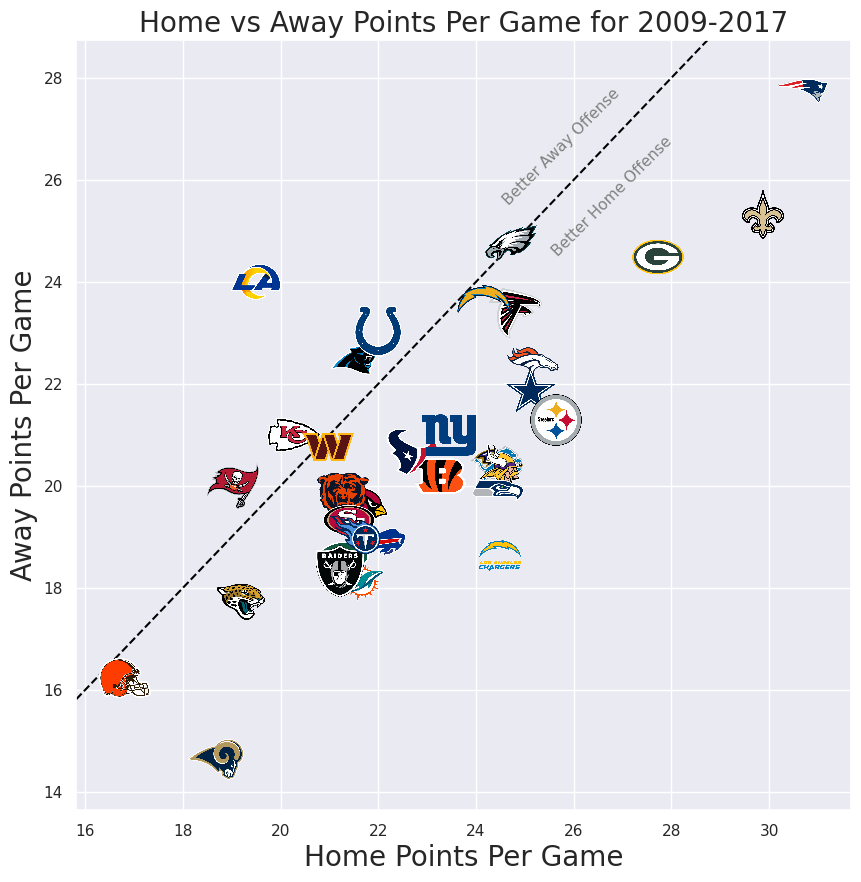

In [190]:
plot_margins(offense_all, "2009-2017", 25, 45, "", sb_x = 20, sb_y = 20)

In [187]:
offense_all = add_logos(offense_all)

In [195]:
offense_all.sort_values(by = 'NetHomeMargin', ascending=False)

,Team,HomeMargin,AwayMargin,NetHomeMargin,Logo
16,LAC,24.500000,18.625000,5.875000,logos/LAC.png
21,NO,29.875000,25.319444,4.555556,logos/NO.tif
28,SEA,24.444444,19.916667,4.527778,logos/SEA.tif
26,PIT,25.638889,21.291667,4.347222,logos/PIT.tif
19,MIN,24.472222,20.319444,4.152778,logos/MIN.tif
10,DET,24.430556,20.402778,4.027778,logos/DET.tif
30,STL,18.660714,14.642857,4.017857,logos/STL.png
2,BAL,24.430556,20.486111,3.944444,logos/BAL.tif
18,MIA,21.583333,18.111111,3.472222,logos/MIA.tif
11,GB,27.722222,24.486111,3.236111,logos/GB.tif


In [191]:
def defense(df):
    """Create a dataframe of teams' home and away points allowed in a season"""
    home = df.groupby('HomeTeam')['AwayScore'].mean()
    away = df.groupby('AwayTeam')['HomeScore'].mean()
    total_defense_df = pd.DataFrame({'Team': home.index,
                                'HomeMargin': home.values,
                                'AwayMargin': away.values,
                                'NetHomeMargin': (home.values-away.values)
                                    })
    return total_defense_df

defense_all = defense(all_years_df)

In [192]:
defense_all = add_logos(defense_all)

In [194]:
defense_all.sort_values(by = 'NetHomeMargin')

,Team,HomeMargin,AwayMargin,NetHomeMargin,Logo
2,BAL,16.944444,21.555556,-4.611111,logos/BAL.tif
13,IND,20.791667,25.277778,-4.486111,logos/IND.tif
29,SF,18.305556,22.541667,-4.236111,logos/SF.tif
11,GB,19.097222,23.222222,-4.125000,logos/GB.tif
23,NYJ,19.319444,23.236111,-3.916667,logos/NYJ.tif
3,BUF,21.333333,24.833333,-3.500000,logos/BUF.tif
15,KC,19.027778,22.388889,-3.361111,logos/KC.tif
4,CAR,19.819444,23.125000,-3.305556,logos/CAR.tif
27,SD,20.375000,23.640625,-3.265625,logos/SD.png
25,PHI,20.888889,24.027778,-3.138889,logos/PHI.tif


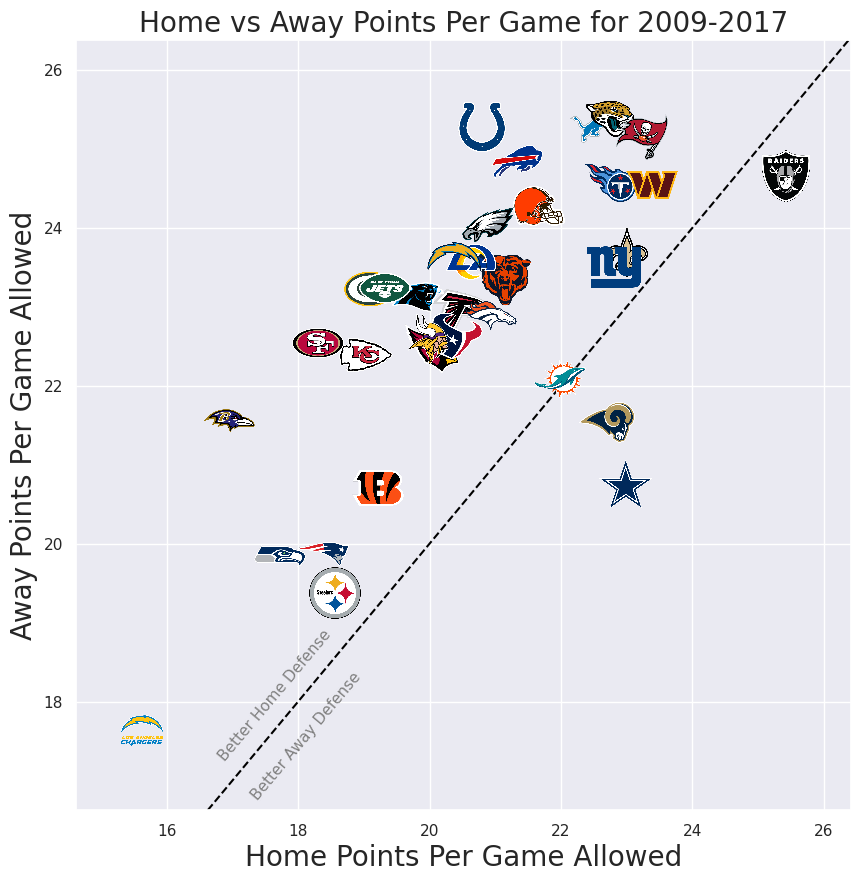

In [201]:
plot_margins(defense_all, "2009-2017", 17, 50, "", sb_x = 20, sb_y = 20)

In [217]:
all_years_df.Date = pd.to_datetime(all_years_df.Date)

In [240]:
result_df = all_years_df.groupby([pd.DatetimeIndex(all_years_df['Date']).month, 'HomeTeam', 'Winner']).size().unstack(fill_value=0)
result_df = result_df.div(result_df.sum(axis=1), axis=0)  # Normalize by row

result_df = result_df.reset_index()
print(result_df)

Winner  Date HomeTeam        -1         0         1
0          1      ARI  0.666667  0.333333  0.000000
1          1      ATL  0.000000  0.250000  0.750000
2          1      BAL  0.000000  0.000000  1.000000
3          1      BUF  0.000000  0.000000  1.000000
4          1      CAR  0.000000  0.000000  1.000000
..       ...      ...       ...       ...       ...
164       12       SF  0.125000  0.125000  0.750000
165       12      STL  0.615385  0.000000  0.384615
166       12       TB  0.684211  0.105263  0.210526
167       12      TEN  0.500000  0.045455  0.454545
168       12      WAS  0.619048  0.047619  0.333333

[169 rows x 5 columns]


In [241]:
result_df['Date'] = result_df['Date'].map({9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec', 1:'Jan'})

result_df = result_df.drop(columns=[-1,0])
result_df = result_df.rename(columns = {1:'HomeWinPercent'})

In [257]:
result_df = result_df.rename(columns = {'Date':'Month'})

In [262]:
months_cross = pd.crosstab(result_df['HomeTeam'], result_df['Month'], values=result_df['HomeWinPercent'], aggfunc='mean', margins=True, margins_name='Average')

In [263]:
column_order = ['Sep', 'Oct','Nov','Dec','Jan']  # Replace with your actual date values
months_cross = months_cross[column_order]
months_cross = months_cross.drop(columns=['Jan'])
months_cross

Month,Sep,Oct,Nov,Dec
HomeTeam,,,,
ARI,0.666667,0.473684,0.428571,0.571429
ATL,0.769231,0.647059,0.666667,0.529412
BAL,0.800000,0.466667,0.700000,0.666667
BUF,0.555556,0.400000,0.533333,0.454545
CAR,0.470588,0.411765,0.529412,0.789474
CHI,0.500000,0.562500,0.500000,0.238095
CIN,0.571429,0.555556,0.588235,0.650000
CLE,0.357143,0.473684,0.333333,0.294118
DAL,0.642857,0.277778,0.521739,0.266667


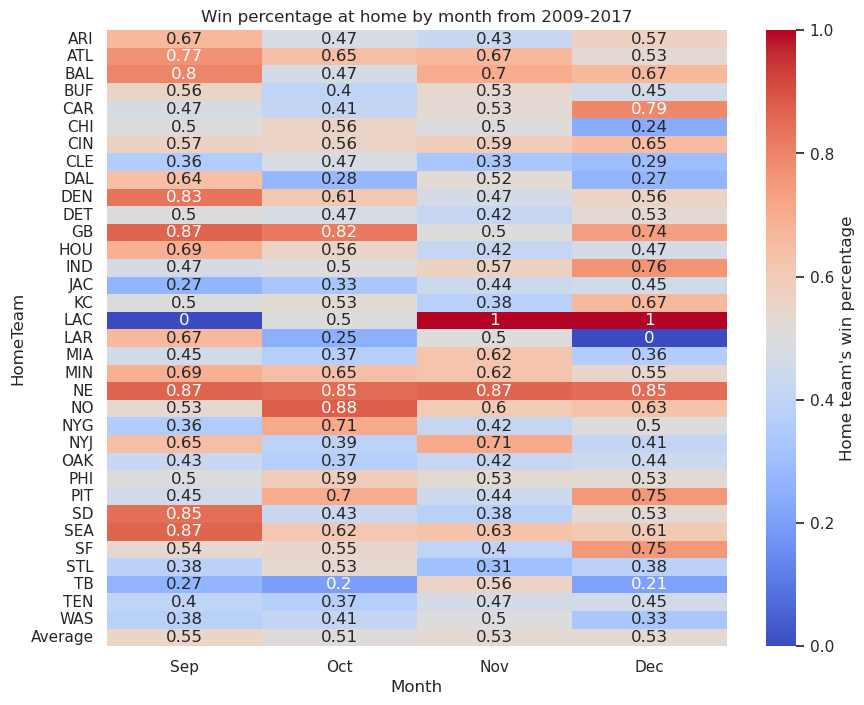

In [264]:
head_to_head_table = months_cross
plt.figure(figsize=(10, 8))
sns.heatmap(head_to_head_table, annot=True, cmap='coolwarm', cbar_kws={'label': "Home team's win percentage"})
plt.title('Win percentage at home by month from 2009-2017')
plt.show()

In [286]:
def ints(df):
    """Add the home team's and away team's turnovers as columns to dataframe"""
    df['HomeInt'] = df.apply(lambda row: 1
                                if row['posteam'] == row['HomeTeam']
                                and row['InterceptionThrown']==1 else 0, axis=1)
    df['AwayInt'] = df.apply(lambda row: 1
                                if row['posteam'] == row['AwayTeam']
                                and row['InterceptionThrown']==1 else 0, axis=1)
    df['HomeFumble'] = df.apply(lambda row: 1
                                if row['posteam'] == row['HomeTeam']
                                and row['Fumble']==1 else 0, axis=1)
    df['AwayFumble'] = df.apply(lambda row: 1
                                if row['posteam'] == row['AwayTeam']
                                and row['Fumble']==1 else 0, axis=1)
    df['HomeSack'] = df.apply(lambda row: 1
                                if row['posteam'] == row['HomeTeam']
                                and row['Sack']==1 else 0, axis=1)
    df['AwaySack'] = df.apply(lambda row: 1
                                if row['posteam'] == row['AwayTeam']
                                and row['Sack']==1 else 0, axis=1)
    return df

In [287]:
df_trim = ints(df_trim)

In [288]:
len(df_trim)


407688

In [304]:
def home_away(df, homecol, awaycol):
    """Create a dataframe of teams' home and away points allowed in a season"""
    home = df.groupby(['HomeTeam', 'GameID'])[homecol].sum().reset_index()
    home = home.groupby('HomeTeam')[homecol].mean().reset_index()
    away = df.groupby(['AwayTeam', 'GameID'])[awaycol].sum().reset_index()
    away = away.groupby('AwayTeam')[awaycol].mean().reset_index()
    total_defense_df = pd.DataFrame({'Team': home['HomeTeam'],
                                homecol: home[homecol],
                                awaycol: away[awaycol],
                                'NetHomeMargin': (home[homecol] - away[awaycol])
                                    })
    return total_defense_df

interceptions = home_away(df_trim, 'HomeInt', 'AwayInt')

In [306]:
interceptions.sort_values(by='NetHomeMargin')

,Team,HomeInt,AwayInt,NetHomeMargin
2,BAL,0.722222,1.138889,-0.416667
16,LAC,0.625000,1.000000,-0.375000
3,BUF,0.888889,1.166667,-0.277778
26,PIT,0.805556,1.069444,-0.263889
13,IND,0.916667,1.152778,-0.236111
9,DEN,0.833333,1.041667,-0.208333
20,NE,0.486111,0.680556,-0.194444
21,NO,0.875000,1.055556,-0.180556
30,STL,0.839286,1.017857,-0.178571
32,TEN,0.930556,1.097222,-0.166667


In [307]:
fumbles = home_away(df_trim, 'HomeFumble', 'AwayFumble')
sacks = home_away(df_trim, 'HomeSack', 'AwaySack')

In [320]:
fumbles = add_logos(fumbles)
fumbles.sort_values(by='NetHomeMargin')
fumbles

,Team,HomeFumble,AwayFumble,NetHomeMargin,Logo
0,ARI,1.361111,1.500000,-0.138889,logos/ARI.tif
1,ATL,1.027778,0.930556,0.097222,logos/ATL.tif
2,BAL,0.930556,1.166667,-0.236111,logos/BAL.tif
3,BUF,1.263889,1.388889,-0.125000,logos/BUF.tif
4,CAR,1.138889,0.972222,0.166667,logos/CAR.tif
5,CHI,1.319444,1.416667,-0.097222,logos/CHI.tif
6,CIN,0.958333,1.402778,-0.444444,logos/CIN.tif
7,CLE,1.222222,1.416667,-0.194444,logos/CLE.tif
8,DAL,1.291667,1.166667,0.125000,logos/DAL.tif
9,DEN,1.319444,1.097222,0.222222,logos/DEN.tif


In [317]:
sacks.sort_values(by='NetHomeMargin')
sacks = add_logos(sacks)

In [353]:
sacks.sort_values(by='NetHomeMargin')

,Team,HomeSack,AwaySack,NetHomeMargin,Logo
3,BUF,2.291667,2.847222,-0.555556,logos/BUF.tif
2,BAL,1.902778,2.416667,-0.513889,logos/BAL.tif
6,CIN,1.861111,2.375000,-0.513889,logos/CIN.tif
19,MIN,2.305556,2.791667,-0.486111,logos/MIN.tif
11,GB,2.638889,3.097222,-0.458333,logos/GB.tif
24,OAK,1.944444,2.319444,-0.375000,logos/OAK.tif
18,MIA,2.486111,2.861111,-0.375000,logos/MIA.tif
15,KC,2.347222,2.722222,-0.375000,logos/KC.tif
0,ARI,2.541667,2.875000,-0.333333,logos/ARI.tif
5,CHI,2.388889,2.666667,-0.277778,logos/CHI.tif


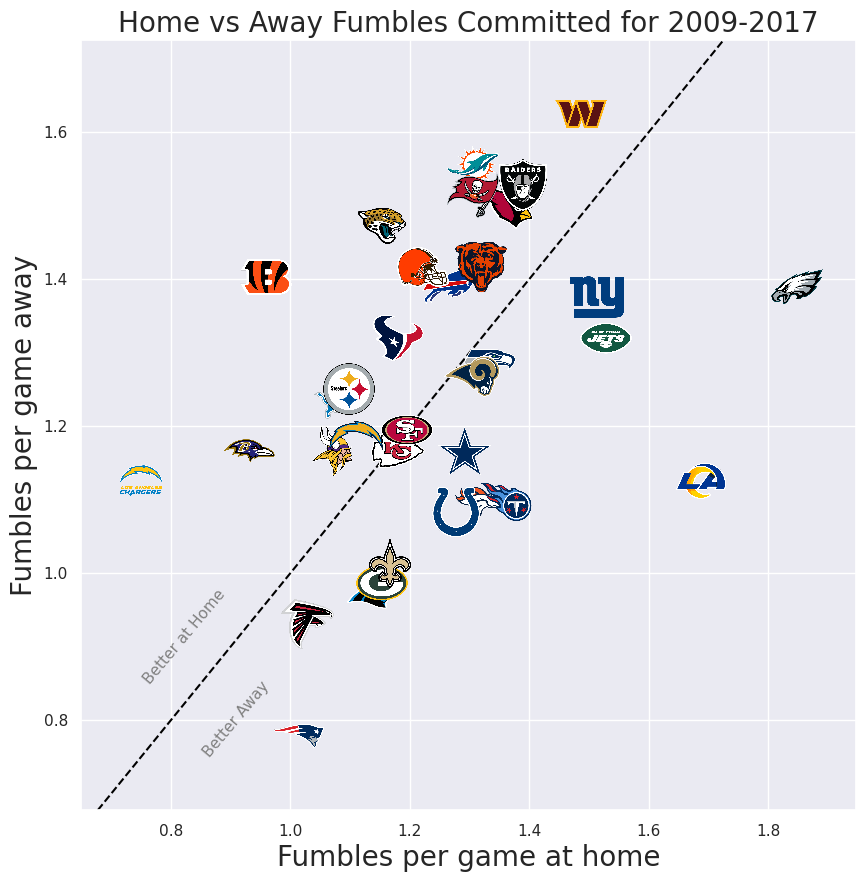

In [342]:
plot_margins(fumbles, "2009-2017", 0.8, 50, "", 20, 20, 'HomeFumble', 'AwayFumble')

In [332]:
interceptions = add_logos(interceptions)

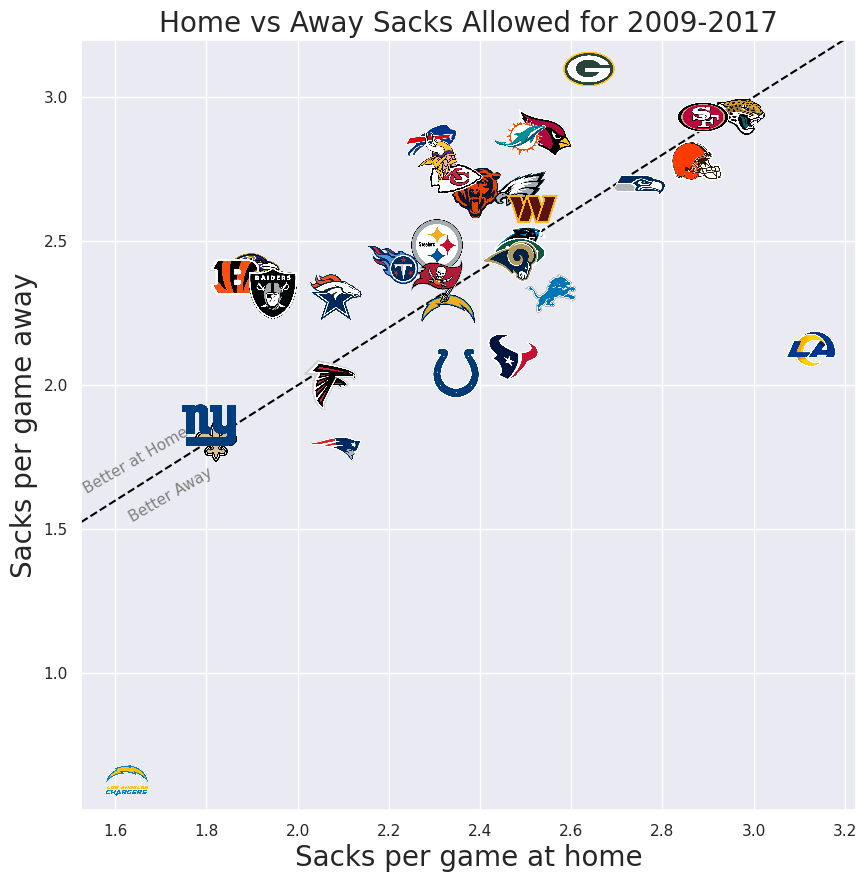

In [350]:
plot_margins(sacks, "2009-2017", 1.575, 30, "", 20, 20, 'HomeSack', 'AwaySack')

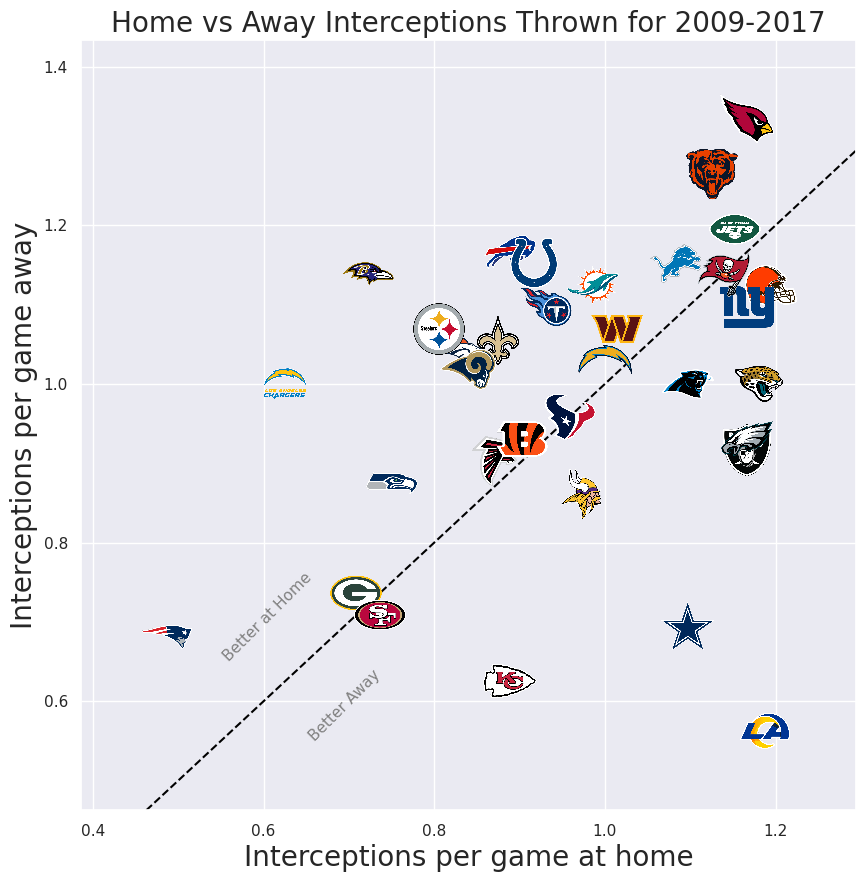

In [352]:
plot_margins(interceptions, "2009-2017", 0.6, 45, "", 20, 20, 'HomeInt', 'AwayInt')

In [357]:
df_trim['PenalizedTeam'] = df.PenalizedTeam
df_trim

,Date,GameID,posteam,DefensiveTeam,PlayType,PassAttempt,PassLength,AirYards,YardsAfterCatch,InterceptionThrown,RushAttempt,Reception,FieldGoalResult,FieldGoalDistance,Fumble,Sack,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,Season,HomeInt,AwayInt,HomeFumble,AwayFumble,HomeSack,AwaySack,PenalizedTeam
0,2009-09-10,2009091000,PIT,TEN,Kickoff,0,NaN,0,0,0,0,0,NaN,NaN,0,0,0.0,0.0,PIT,TEN,2009,0,0,0,0,0,0,NaN
1,2009-09-10,2009091000,PIT,TEN,Pass,1,Short,-3,8,0,0,1,NaN,NaN,0,0,0.0,0.0,PIT,TEN,2009,0,0,0,0,0,0,NaN
2,2009-09-10,2009091000,PIT,TEN,Run,0,NaN,0,0,0,1,0,NaN,NaN,0,0,0.0,0.0,PIT,TEN,2009,0,0,0,0,0,0,NaN
3,2009-09-10,2009091000,PIT,TEN,Pass,1,Deep,34,0,0,0,0,NaN,NaN,0,0,0.0,0.0,PIT,TEN,2009,0,0,0,0,0,0,NaN
4,2009-09-10,2009091000,PIT,TEN,Punt,0,NaN,0,0,0,0,0,NaN,NaN,0,0,0.0,0.0,PIT,TEN,2009,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,NaN,NaN,Timeout,0,NaN,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN,BAL,CIN,2017,0,0,0,0,0,0,NaN
407684,2017-12-31,2017123101,BAL,CIN,Pass,1,Short,12,0,0,0,0,NaN,NaN,0,0,27.0,30.0,BAL,CIN,2017,0,0,0,0,0,0,NaN
407685,2017-12-31,2017123101,BAL,CIN,Pass,1,Short,10,3,0,0,1,NaN,NaN,0,0,27.0,30.0,BAL,CIN,2017,0,0,0,0,0,0,NaN
407686,2017-12-31,2017123101,CIN,BAL,QB Kneel,0,NaN,0,0,0,0,0,NaN,NaN,0,0,30.0,27.0,BAL,CIN,2017,0,0,0,0,0,0,NaN


In [369]:
def penalties(df):
    """Add home and away team penalties to dataframe"""
    df['HomePen'] = df.apply(lambda row: 1
                                if row['PenalizedTeam'] == row['HomeTeam']
                                else 0, axis=1)
    df['AwayPen'] = df.apply(lambda row: 1
                                if row['PenalizedTeam'] == row['AwayTeam']
                                else 0, axis=1)
    return df

In [370]:
df_trim= penalties(df_trim)
df_trim

,Date,GameID,posteam,DefensiveTeam,PlayType,PassAttempt,PassLength,AirYards,YardsAfterCatch,InterceptionThrown,RushAttempt,Reception,FieldGoalResult,FieldGoalDistance,Fumble,Sack,PosTeamScore,DefTeamScore,HomeTeam,AwayTeam,Season,HomeInt,AwayInt,HomeFumble,AwayFumble,HomeSack,AwaySack,PenalizedTeam,HomePen,AwayPen
0,2009-09-10,2009091000,PIT,TEN,Kickoff,0,NaN,0,0,0,0,0,NaN,NaN,0,0,0.0,0.0,PIT,TEN,2009,0,0,0,0,0,0,NaN,0,0
1,2009-09-10,2009091000,PIT,TEN,Pass,1,Short,-3,8,0,0,1,NaN,NaN,0,0,0.0,0.0,PIT,TEN,2009,0,0,0,0,0,0,NaN,0,0
2,2009-09-10,2009091000,PIT,TEN,Run,0,NaN,0,0,0,1,0,NaN,NaN,0,0,0.0,0.0,PIT,TEN,2009,0,0,0,0,0,0,NaN,0,0
3,2009-09-10,2009091000,PIT,TEN,Pass,1,Deep,34,0,0,0,0,NaN,NaN,0,0,0.0,0.0,PIT,TEN,2009,0,0,0,0,0,0,NaN,0,0
4,2009-09-10,2009091000,PIT,TEN,Punt,0,NaN,0,0,0,0,0,NaN,NaN,0,0,0.0,0.0,PIT,TEN,2009,0,0,0,0,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,NaN,NaN,Timeout,0,NaN,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN,BAL,CIN,2017,0,0,0,0,0,0,NaN,0,0
407684,2017-12-31,2017123101,BAL,CIN,Pass,1,Short,12,0,0,0,0,NaN,NaN,0,0,27.0,30.0,BAL,CIN,2017,0,0,0,0,0,0,NaN,0,0
407685,2017-12-31,2017123101,BAL,CIN,Pass,1,Short,10,3,0,0,1,NaN,NaN,0,0,27.0,30.0,BAL,CIN,2017,0,0,0,0,0,0,NaN,0,0
407686,2017-12-31,2017123101,CIN,BAL,QB Kneel,0,NaN,0,0,0,0,0,NaN,NaN,0,0,30.0,27.0,BAL,CIN,2017,0,0,0,0,0,0,NaN,0,0


In [376]:
penalized = home_away(df_trim, 'HomePen', 'AwayPen').sort_values(by='NetHomeMargin').reset_index(drop=True)

In [378]:
penalized = add_logos(penalized)
penalized

,Team,HomePen,AwayPen,NetHomeMargin,Logo
0,DEN,6.152778,7.416667,-1.263889,logos/DEN.tif
1,DAL,6.277778,7.305556,-1.027778,logos/DAL.tif
2,OAK,7.555556,8.541667,-0.986111,logos/OAK.tif
3,HOU,5.902778,6.819444,-0.916667,logos/HOU.tif
4,LAC,6.250000,7.125000,-0.875000,logos/LAC.png
5,SF,6.388889,7.263889,-0.875000,logos/SF.tif
6,GB,5.513889,6.305556,-0.791667,logos/GB.tif
7,STL,6.821429,7.589286,-0.767857,logos/STL.png
8,SEA,7.125000,7.875000,-0.750000,logos/SEA.tif
9,NO,5.847222,6.583333,-0.736111,logos/NO.tif


In [381]:
penalized = penalized.drop(27)

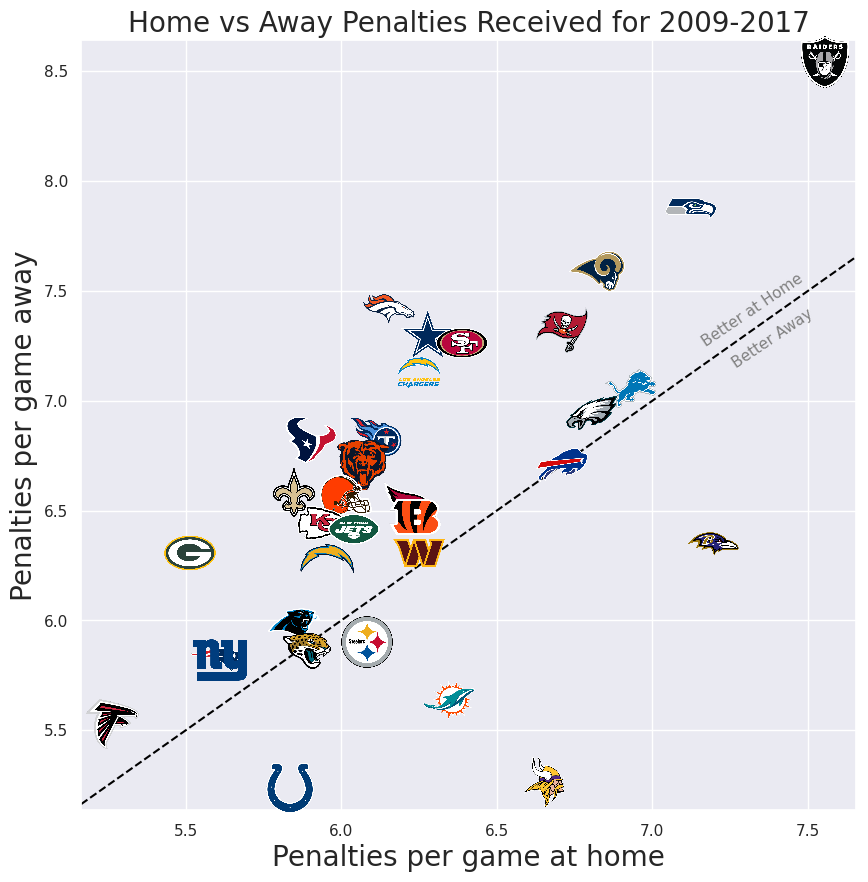

In [387]:
plot_margins(penalized, "2009-2017", 7.2, 34, "", 20, 20, 'HomePen', 'AwayPen')